In [83]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.least_squares import *
from helpers.processing import *
from helpers.feature_transformation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from helpers.proj1_helpers import *
# Aya : '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
DATA_TRAIN_PATH = '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [85]:
features = ['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet',
            'DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt',
            'DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt',
            'PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi',
            'PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi',
            'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

In [86]:
print("Shape of our Dataset: ", tX.shape) # We have 25 000 points and 30 features.
print("Number of points: ", tX.shape[0])
print("Number of features: ", tX.shape[1])

Shape of our Dataset:  (250000, 30)
Number of points:  250000
Number of features:  30


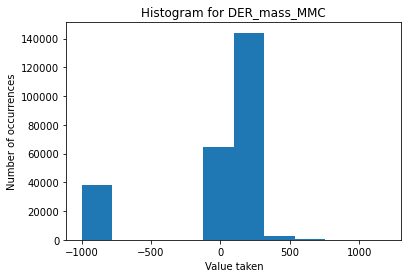

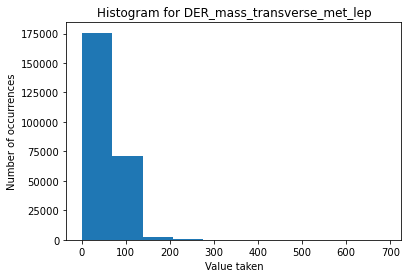

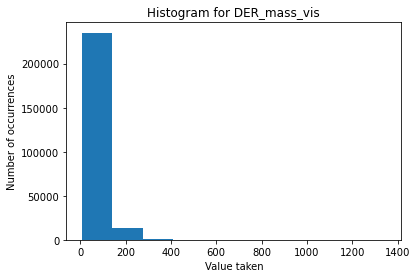

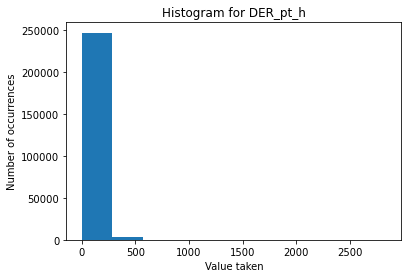

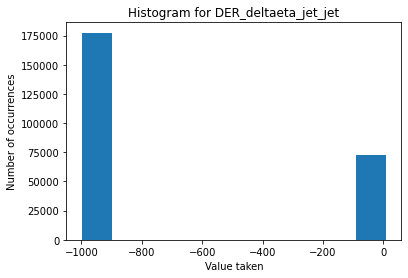

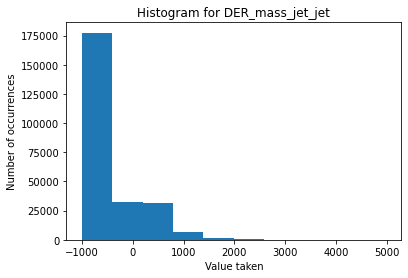

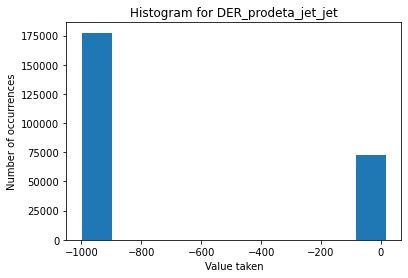

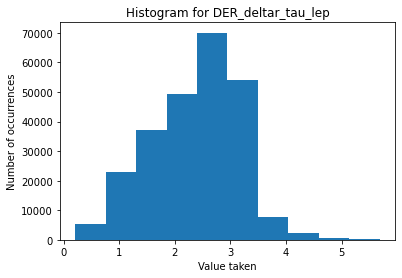

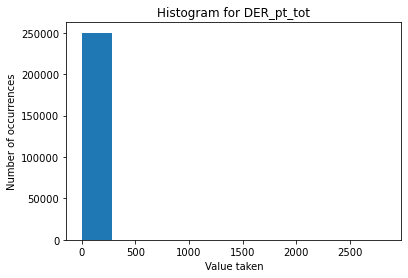

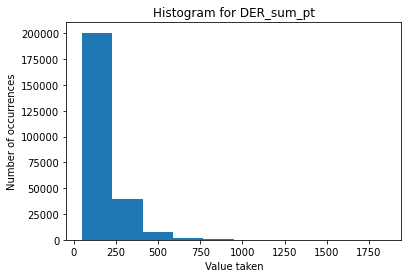

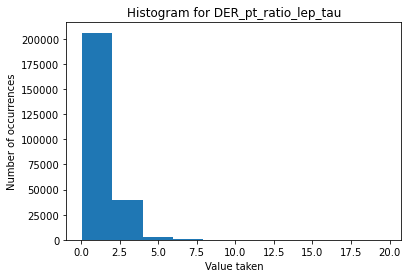

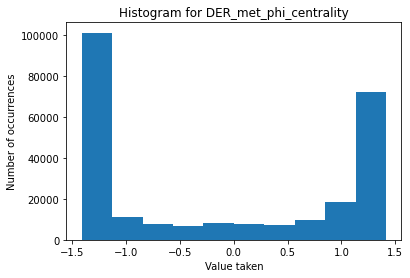

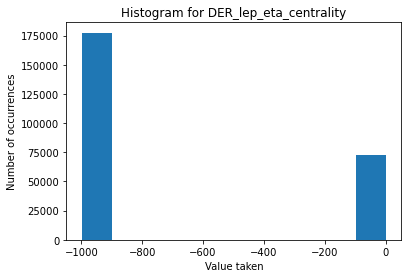

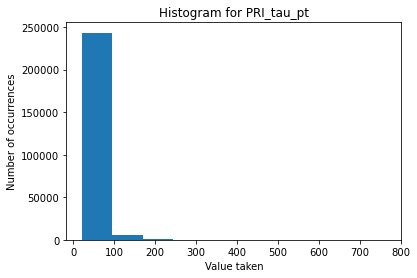

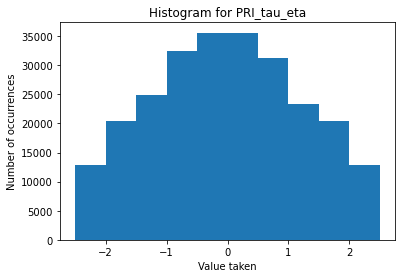

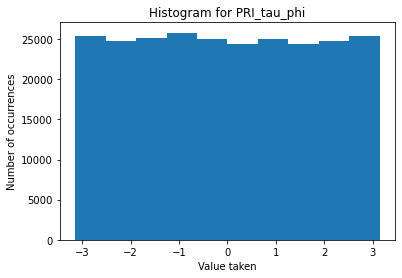

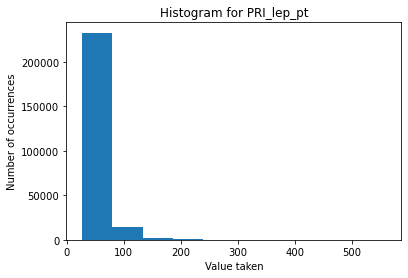

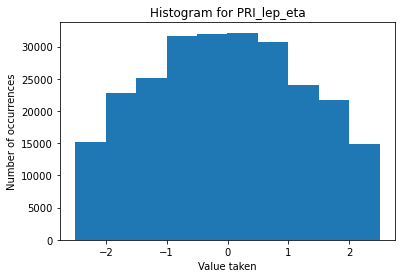

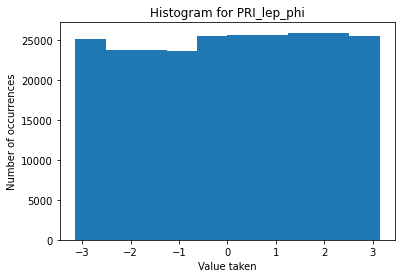

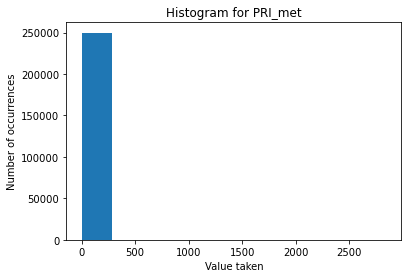

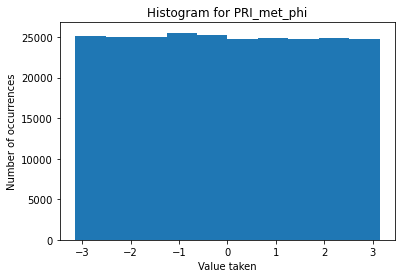

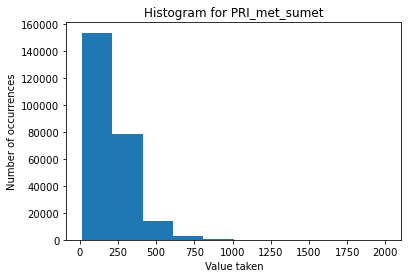

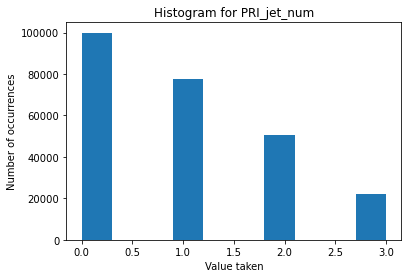

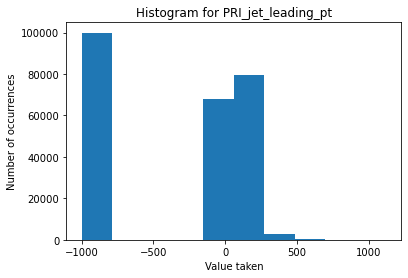

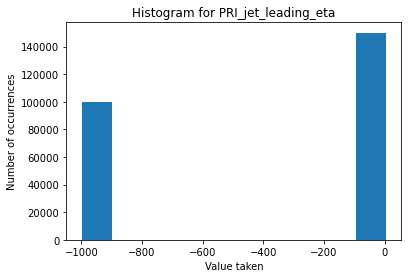

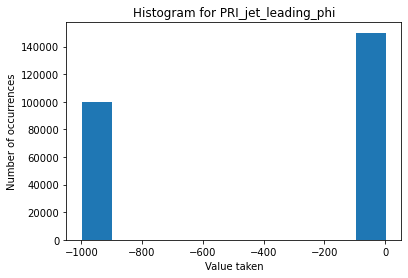

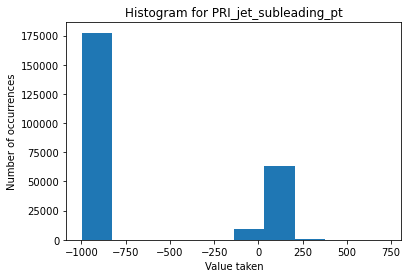

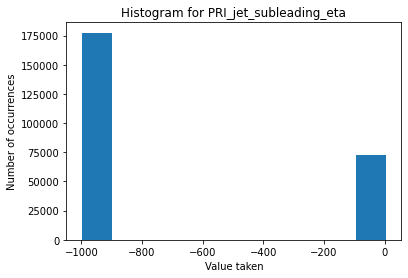

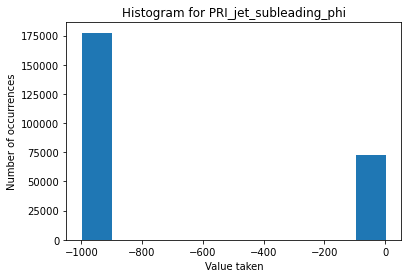

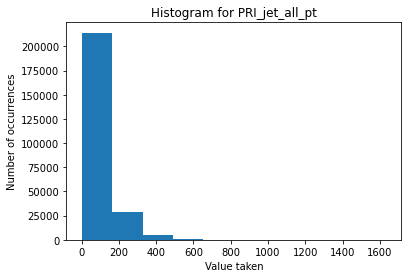

In [87]:
# Let's look at the distribution of our features using histograms.
for i in range(30):
    plt.hist(tX[:,i])
    plt.title("Histogram for " + features[i])
    plt.xlabel('Value taken')
    plt.ylabel('Number of occurrences')
    plt.show()

We concluded that there are a lot of points with the value -999. There are considered as invalid and therefore let's remove them to study the distribution of our dataset without the outliers.

In [88]:
remove_outliers(tX)

array([[ 1.38470e+02,  5.16550e+01,  9.78270e+01, ...,  1.24000e+00,
        -2.47500e+00,  1.13497e+02],
       [ 1.60937e+02,  6.87680e+01,  1.03235e+02, ..., -1.00000e-02,
        -2.00000e-03,  4.62260e+01],
       [ 1.12406e+02,  1.62172e+02,  1.25953e+02, ..., -1.00000e-02,
        -2.00000e-03,  4.42510e+01],
       ...,
       [ 1.05457e+02,  6.05260e+01,  7.58390e+01, ..., -1.00000e-02,
        -2.00000e-03,  4.19920e+01],
       [ 9.49510e+01,  1.93620e+01,  6.88120e+01, ..., -1.00000e-02,
        -2.00000e-03,  0.00000e+00],
       [ 1.12406e+02,  7.27560e+01,  7.08310e+01, ..., -1.00000e-02,
        -2.00000e-03,  0.00000e+00]])

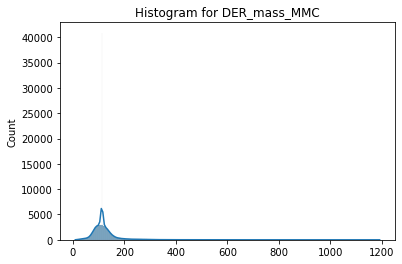

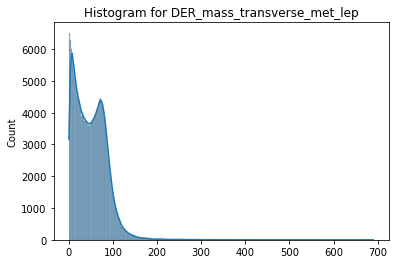

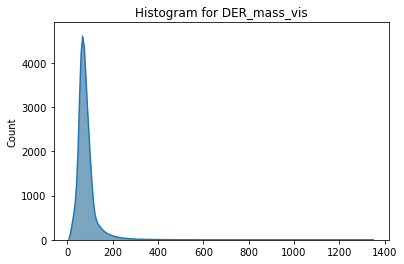

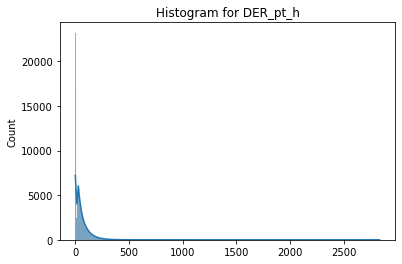

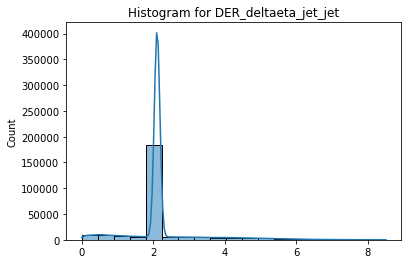

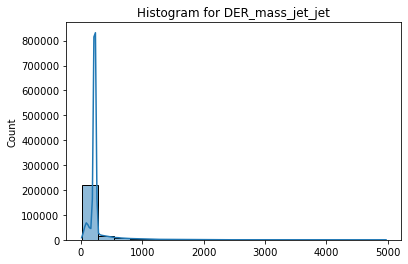

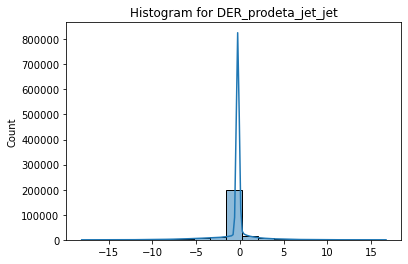

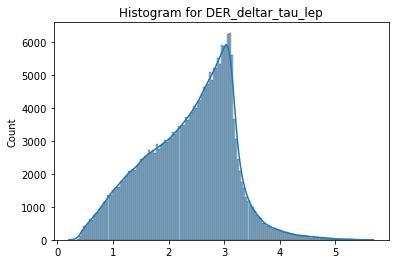

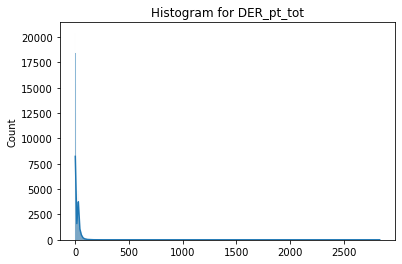

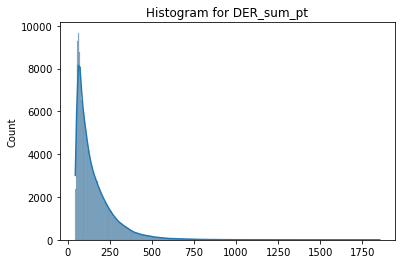

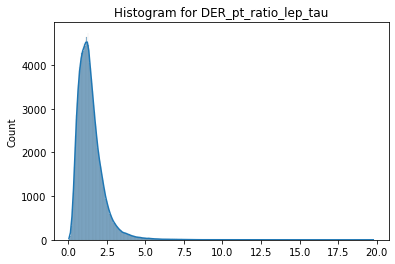

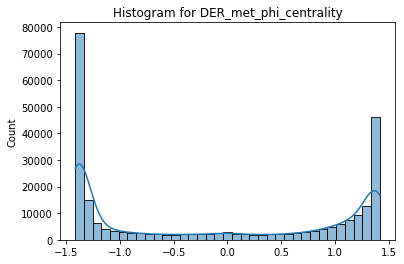

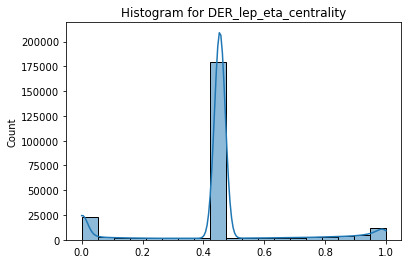

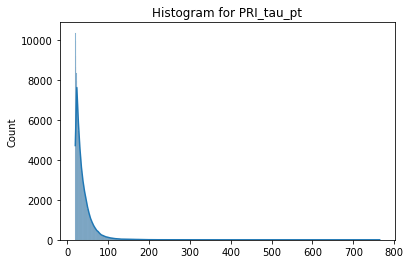

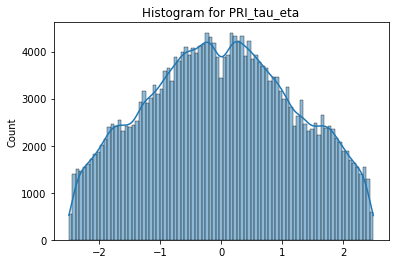

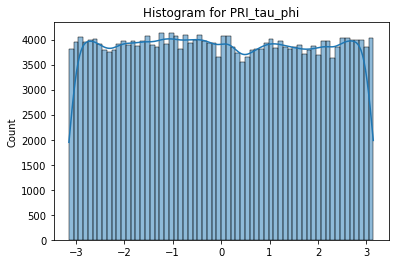

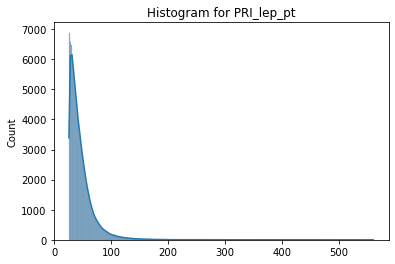

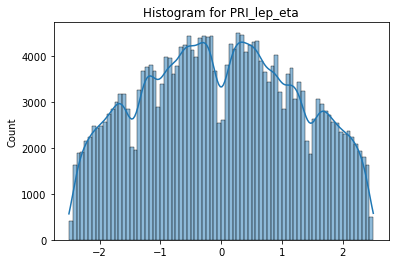

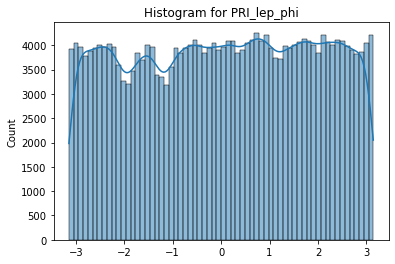

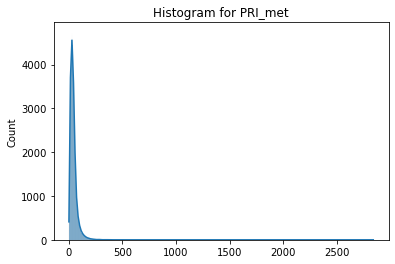

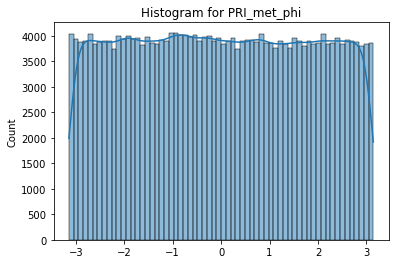

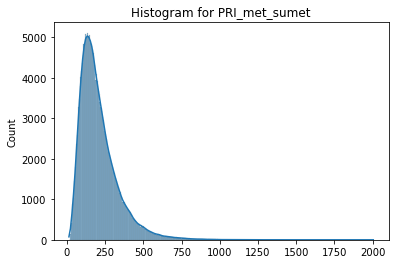

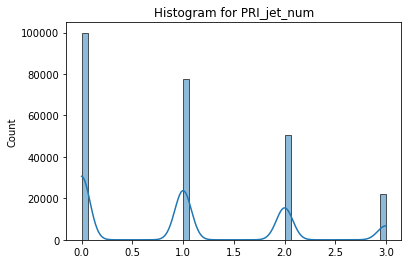

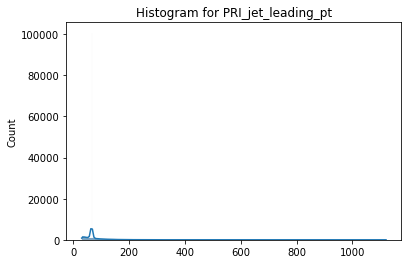

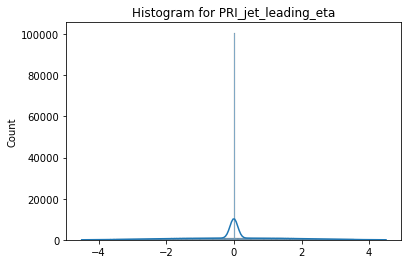

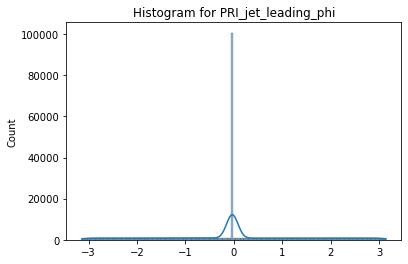

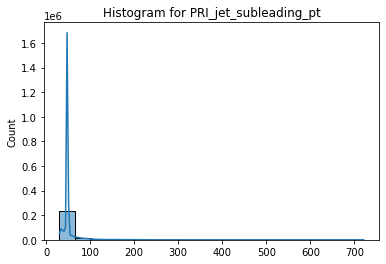

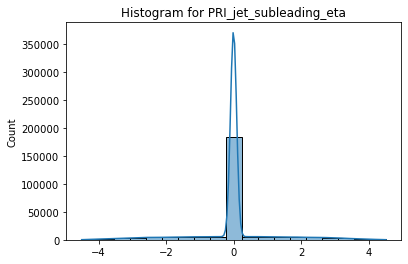

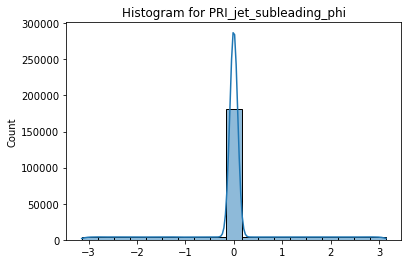

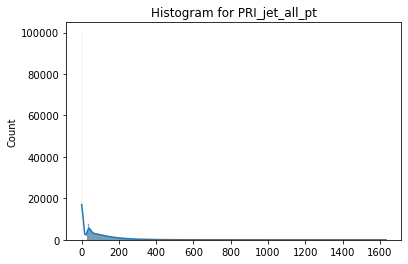

In [89]:
# Let's look at the distribution of our features without the outliers using histograms with curve.
for i in range(30):
    sns.histplot(tX[:,i], kde=True)
    plt.title("Histogram for " + features[i])
    plt.show()

We concluded that a lot of our features are positively skewed and therefore we could use log transformation.

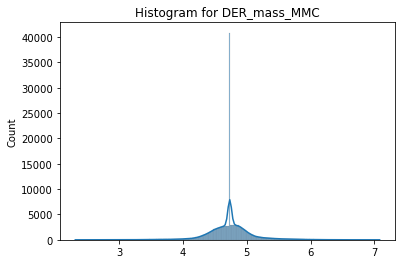

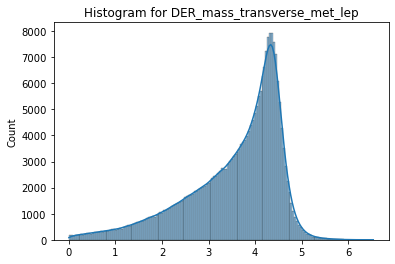

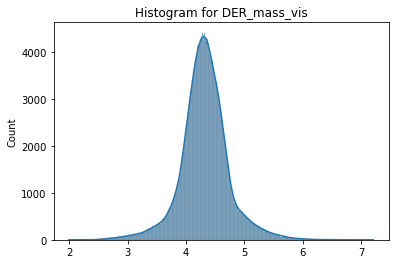

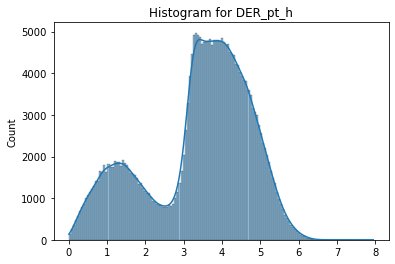

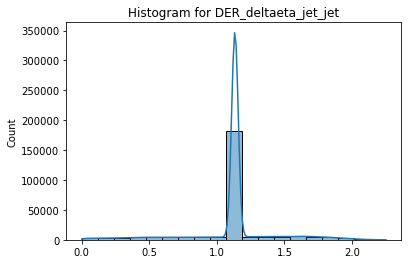

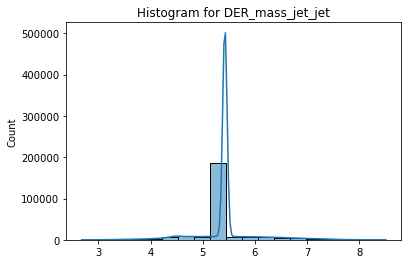

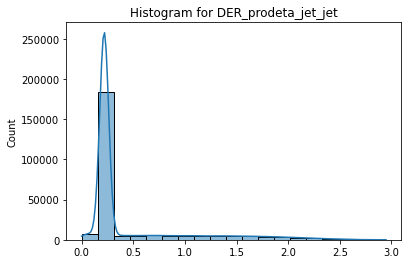

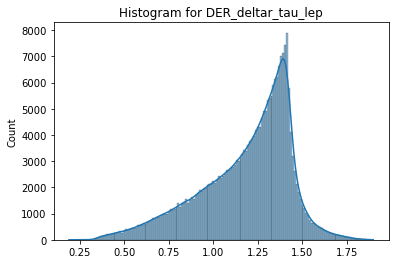

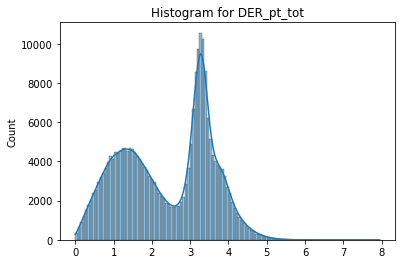

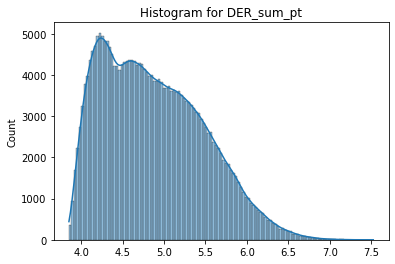

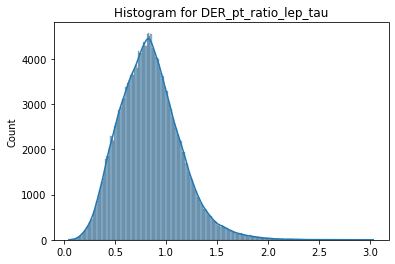

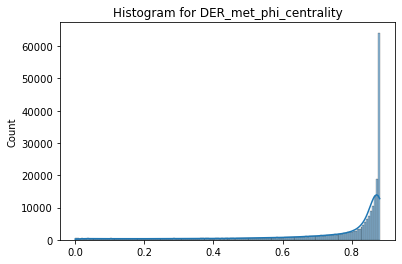

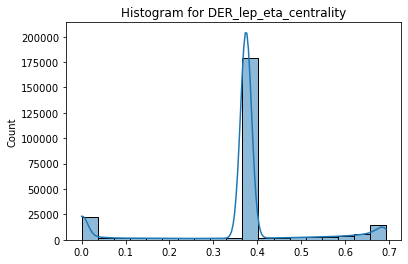

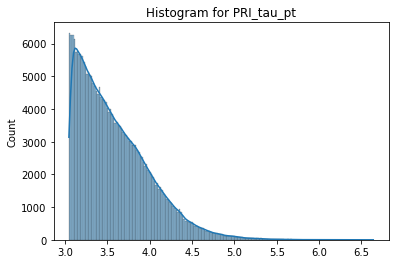

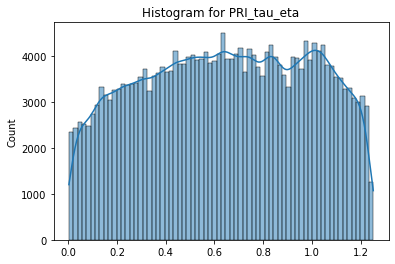

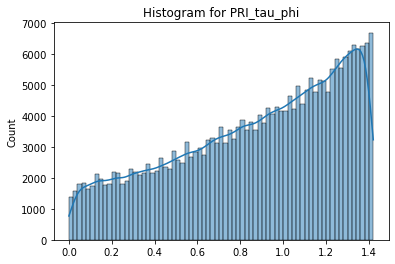

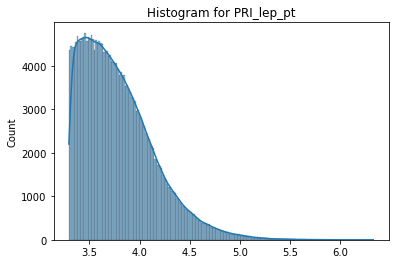

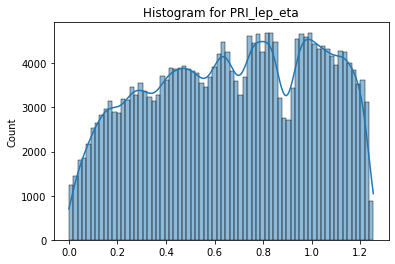

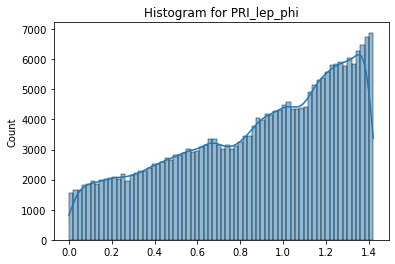

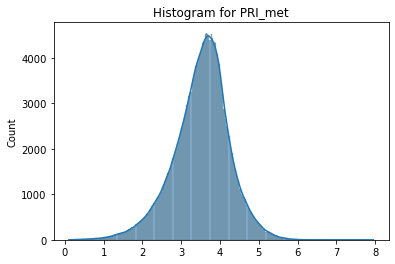

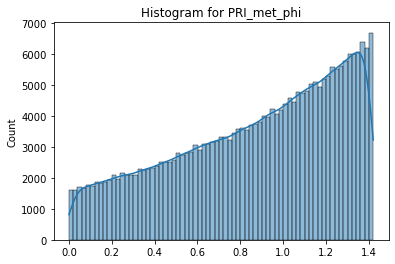

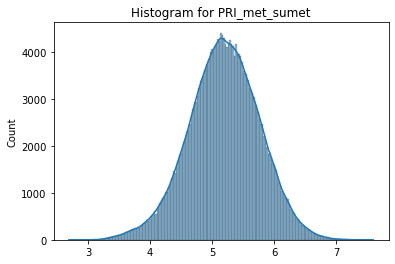

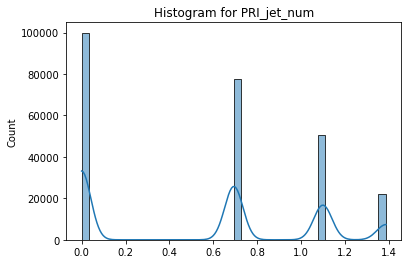

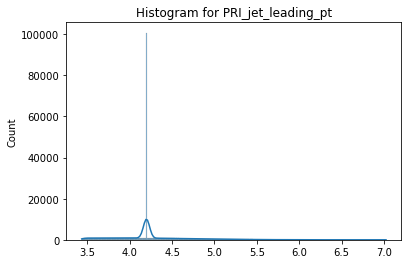

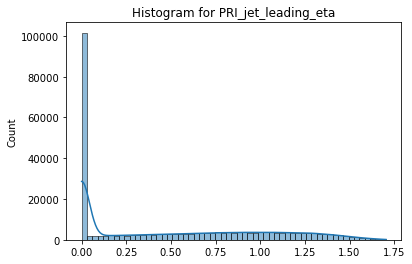

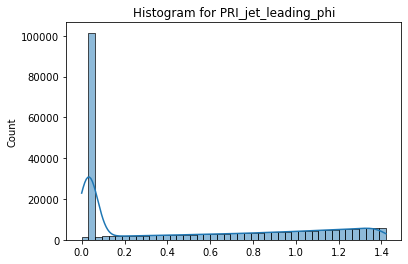

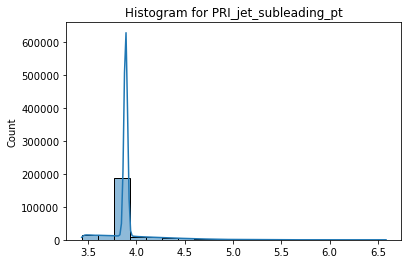

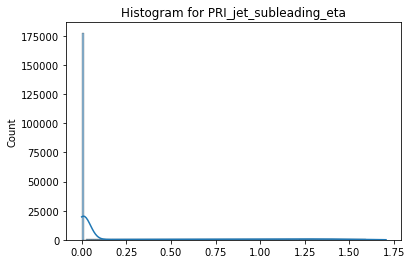

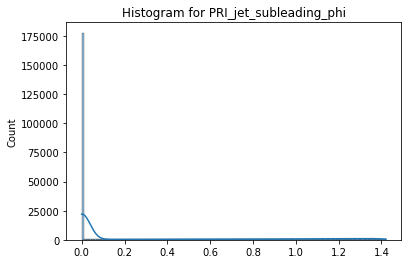

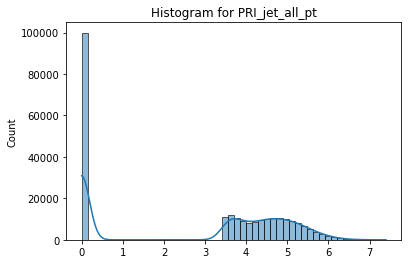

In [90]:
#post log transformation visualization using histogram with curves
matrice = log_transform(tX, np.arange(tX.shape[1]))
for i in range(30):
    sns.histplot(matrice[:,i], kde=True)
    plt.title("Histogram for " + features[i])
    plt.show()

In [91]:
def correlation_matrix(x,y) : #Without outliers
    n = x.shape[1]
    coef = np.zeros((n,n))
    coef = np.corrcoef(x.T) #Return Pearson product-moment correlation coefficients
    plt.figure(figsize = (6,5))
    sns.heatmap(coef,xticklabels = features, yticklabels = features)

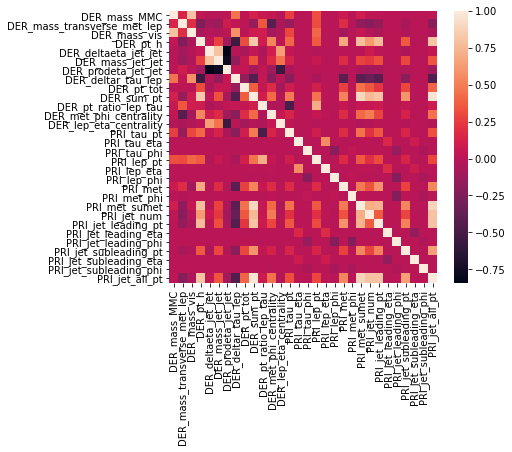

In [92]:
correlation_matrix(tX,y)